<a href="https://colab.research.google.com/github/piotr-osiwianski/data-science-bootcamp/blob/master/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Tensorflow zawiera w sobie biblioteke Keras.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)

>Wagi sa dostosowywane podczas trenowania modelu.
>
>Funkcja aktywacji - w pierwszym przypadku to mnozenie macierzy.
> Taka funkcja moze byc tez funkcja Sigmoid
>
>Funkcja straty - pozwoli nam kontrolowac blad i wskazywac czy nasz model sie uczy czy nie.
>
>Optymalizator - pozwoli uczyc nam sie uczyc naszej sieci.

![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)


Podczas trenowania naszej sieci neuronowej bedziemy dostosowywac wagi W1 i W2 ktora sa w macierzach !!!

### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).



### <a name='a2'></a> Import bibliotek

In [25]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
# pozwoli budowac modele sekwencyjne, ukladamy warstwa po warstwie
from tensorflow.keras.models import Sequential
# klasa wyplaszcza dane, uzyjemy tylko warstwe w naszej sieci, nie trzeba recznie jak wczesniej z reshape()
from tensorflow.keras.layers import Flatten
# warstwa gesto polaczona
from tensorflow.keras.layers import Dense
# warstwa pozwoli nieco kontrolowac uczenie naszego modelu, porzuca pewien $ neuronow w warstwie ukrytej
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.18.0


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [28]:
# funkcja load_data() zwroci nam od razu zbior danych, nie musimy ich dzielic na zbior treningowy i testowy
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [29]:
print(X_train[0])
# wyswietli macierz typu nd array, wymiaru 28x28
# bedziemy chcieli nauczyc naszej sieci, rozpoznawac konkretne klasy - tu liczba 5

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [30]:
# do sieci neuronowych najczesciej wrzucamy dane standaryzowane,
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [36]:
# musimy przygotowac nasze dane treningowe i testowe, podzieli na 255 i uzyskamy wartosci z przedzialu 0 i 1
X_train = X_train / 255.
X_test = X_test / 255.
#print(f'X_train[0] shape: {X_train[0].shape}')
#print(X_train[0])

### <a name='a4'></a>  Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

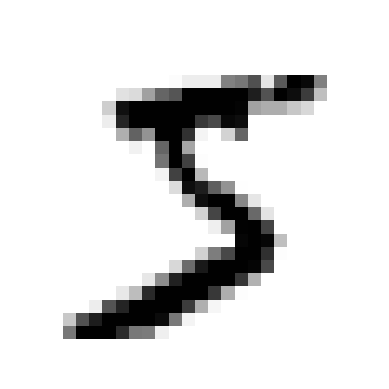

In [37]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

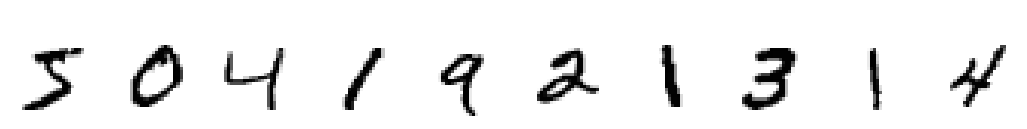

In [38]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

### <a name='a5'></a>  Budowa sieci neuronowej

In [39]:
# zbudujemy nasz model - budowa sieci neuronowej w bibliotece Keras
# na podstwie danych wejsciowych (liczba-element 28x28 pikseli) bedziemy chcieli przewidziec klase dla kazdego zdjecia
# tworzymy instancje modelu klasy Sequentiual
model = Sequential()
# warstwa wyplaszczy nam nasze dane, a przekazujemy na wejsciu dane postaci 28x28
model.add(Flatten(input_shape=(28, 28)))
# warstwa gesto polaczona, zawierajaca 128 neuronow ukrytych, funkcja aktywacji relu (zeruje wartosci ujemne a dodatnie zostawia bez zmian)
model.add(Dense(units=128, activation='relu'))
# warstwa Dropout porzuci 20 % neuronow w tej warstwie
model.add(Dropout(0.2))
# kolejna warstwa wynikowa ktora zawiera 10 neuronow, warstwa wyjsciowa bo mamy 10 klas i metoda softmax ktora zwroci proawdopodobienstwo poszczegolnej klasy
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# warstwa flatten przyjmuje rozmiar 784 = 28x28
# None zarezerwowane dla liczby naszych probek, 60000 bedzie tam wpadac
# warstwa dense: 100,480 parametrow (wag) do przetrenowania
# na koncu mamy 1,290 parametrow (wag) do przetrenowania z 10 klas
# lacznie mamy Total params: 101,770 parametrow do przetrenowania

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### <a name='a6'></a> Trenowanie modelu

In [41]:
# epochs - ile razy nasz caly zbior danych przejdzie przez siec neuronowa
# siec z epoki na epoke coraz lepiej sie uczy, wzrasta accuracy
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9807 - loss: 0.0601
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9821 - loss: 0.0550
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9836 - loss: 0.0518
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9842 - loss: 0.0472
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9862 - loss: 0.0425


### <a name='a7'></a> Ocena modelu

In [44]:
# biblioteka Keras przerzuci nasz model testowy przez siec i policzy accuracy
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9805 - loss: 0.0680


[0.06801402568817139, 0.9804999828338623]

In [45]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.979767,0.063705
1,0.981167,0.057280
2,0.982517,0.053918
3,0.984183,0.047879
4,0.985450,0.044576


In [46]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)
# zalezy nam na minimalizacji funkcji straty w kolejnych epokach i maksymalizacji accuracy

### <a name='a8'></a> Predykcja na podstawie modelu

In [47]:
# zwroci wartosc prawdopodobienstwa dla kazdej klasy
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.000000000002, 0.00000000004 , 0.000002924896, ..., 0.9998794     , 0.000000021431, 0.000002512347],
       [0.00000000683 , 0.00009496947 , 0.9999048     , ..., 0.            , 0.000000079625, 0.            ],
       [0.000000011477, 0.9999091     , 0.00002079577 , ..., 0.000051256353, 0.000011461318, 0.000000004745],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000607897, 0.000000000785, 0.000000182525],
       [0.000000000112, 0.000000000002, 0.            , ..., 0.000000000057, 0.0000804509  , 0.            ],
       [0.00000000398 , 0.000000000023, 0.00000007724 , ..., 0.            , 0.000000000376, 0.            ]],
      dtype=float32)

In [53]:
# zamiast prawdopodobienstw mozemy od razu zwrocic klasy
#y_pred = model.predict_classes(X_test)
#y_pred
# z internetu:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [54]:
# ktore klasy nasz obiekt zle sklasyfikowal
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


from matplotlib import pyplot as plt
_df_0['y_test'].plot(kind='hist', bins=20, title='y_test')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['y_pred'].plot(kind='hist', bins=20, title='y_pred')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='y_test', y='y_pred', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['y_test'].plot(kind='line', figsize=(8, 4), title='y_test')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['y_pred'].plot(kind='line', figsize=(8, 4), title='y_pred')
plt.gca().spines[['top', 'right']].set_visible(False)

In [55]:
# wyswietlamy 10 pierwszych bledow zle zinterpretowanych
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([247, 259, 321, 340, 381, 445, 582, 619, 659, 691], dtype='int64')

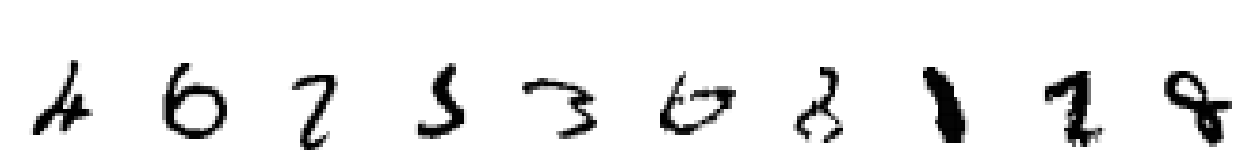

In [57]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()